<a href="https://colab.research.google.com/github/msommerfe/CAS_Applied_Data_Science/blob/main/testing_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-ocr

In [4]:
import zipfile
import datetime
import string
import glob
import math
import os

import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.model_selection

import keras_ocr

In [2]:
try:
  from google.colab import drive
  import os
  drive.mount('/content/drive')
  data_dir = 'drive/My Drive/colab/keras-ocr'
  os.makedirs(data_dir, exist_ok=True)
except ImportError:
  data_dir = '.'

Mounted at /content/drive


In [5]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

cropImgFolder = '/content/drive/MyDrive/development/datasets/Crop_Pics/'

croppedImages = load_images_from_folder(cropImgFolder)

In [51]:
# For custom Weights use:


alphabet = string.digits + string.ascii_letters + '!?.- '
#alphabet = '!?. '
recognizer_alphabet = ''.join(sorted(set(alphabet.lower())))

recognizer = keras_ocr.recognition.Recognizer(
    alphabet=recognizer_alphabet,
    weights='kurapan'
)
recognizer.compile()


detector = keras_ocr.detection.Detector()
#Custom Weights detector
#detector.model.load_weights('/content/drive/MyDrive/colab/keras-ocr/detector_2024-04-18T09:43:34.356054.h5')

#Default Weights Detector
#detector.model.load_weights('https://github.com/faustomorales/keras-ocr/releases/download/v0.8.4/craft_mlt_25k.h5')

#Wichtig,..der Recognizer muss mit den gleichen Alphabet erstellt wurden sein, wie die erstellte h5 Datei
#recognizer = keras_ocr.recognition.Recognizer()
recognizer.model.load_weights('/content/drive/MyDrive/colab/keras-ocr/recognizer_2024-04-18T18:48:43.868881.h5')
pipeline = keras_ocr.pipeline.Pipeline(detector= detector, recognizer = recognizer)

Provided alphabet does not match pretrained alphabet. Using backbone weights only.
Looking for /root/.keras-ocr/crnn_kurapan_notop.h5
Looking for /root/.keras-ocr/craft_mlt_25k.h5


In [53]:
#Default Weights Detector
#detector.model.load_weights('/content/drive/MyDrive/colab/keras-ocr/PreTrainedWeights/craft_mlt_25k_detector.h5')
detector = keras_ocr.detection.Detector()
#Custom Weights detector
#detector.model.load_weights('/content/drive/MyDrive/colab/keras-ocr/detector_2024-04-18T13:57:16.172164.h5')


#Wichtig,..der Recognizer muss mit den gleichen Alphabet erstellt wurden sein, wie die erstellte h5 Datei

#Default weights recognizer
recognizer = keras_ocr.recognition.Recognizer()
#Default weights recognizer
#recognizer.model.load_weights('/content/drive/MyDrive/colab/keras-ocr/PreTrainedWeights/crnn_kurapan_recognizer.h5')
#Custom weights recognizer
recognizer.model.load_weights('/content/drive/MyDrive/colab/keras-ocr/PreTrainedWeights/recognizer_borndigital.h5')

pipeline = keras_ocr.pipeline.Pipeline(detector= detector, recognizer = recognizer)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [13]:
def getResultText(_result):

  # Sort the nested list based on the x-coordinate (horizontal position)
  #sorted_data = sorted(_result, key=lambda x: x[1][0][0])
  sorted_data = _result

  predictedEVN = ""
  for i in sorted_data:
    predictedEVN = predictedEVN + i[0]

  return predictedEVN

In [14]:
def sortKerasResults(_result):
  if _result == []:
    display('result text is empty sorting not possible')
    return getResultText('null')


  _result = sorted(_result, key=lambda x: x[1][0][0])
  remaining = _result
  i = 0
  bla = []
  while True:
    topLeftItem = sorted(remaining, key=lambda x: (x[1][0][0]*x[1][0][0]) + (x[1][0][1]*x[1][0][1]))[0]
    #((y4 - y1)/2) + y1
    row_threashold = (((topLeftItem[1][3][1] - topLeftItem[1][0][1]) / 1.8) + topLeftItem[1][0][1])
    bla= bla + list(filter(lambda p: p[1][0][1] < row_threashold, remaining))
    #display('bla  after Iteration ' + str(i) + '   :' + str(getResultText(bla)))
    remaining= list(filter(lambda p: p[1][0][1] >= row_threashold,_result))
    #display('remaining  after Iteration ' + str(i) + '   :' + str(getResultText(remaining)))
    i=i+1
    if (remaining == []):
      display("break")
      break
    if (i > 5):
      display("break")
      break



  return getResultText(bla)


#ocrResult = pipeline.recognize([croppedImages[1]])
#getResultText(results[1])
#print(getResultText(ocrResult[0]))
#print(sortKerasResults(ocrResult[0]))
#plt.imshow(ultralytics_crop_objects[6])
#plt.show()

In [16]:
def isEVNValid(evn):
  if len(evn) != 12:
    return False
  else:
    return True

print(isEVNValid("12345678901"))

False


1/1 [==============================] - 4s 4s/step


[('ofr',
  array([[472.2401  ,  22.615295],
         [691.8496  ,  20.705643],
         [693.04834 , 158.55609 ],
         [473.43884 , 160.46574 ]], dtype=float32)),
 ('8',
  array([[317.00815 ,  37.422928],
         [480.65915 ,  34.275787],
         [483.1841  , 165.57338 ],
         [319.5331  , 168.72052 ]], dtype=float32)),
 ('',
  array([[259.,  50.],
         [305.,  50.],
         [305., 163.],
         [259., 163.]], dtype=float32)),
 ('b',
  array([[131.,  48.],
         [236.,  48.],
         [236., 179.],
         [131., 179.]], dtype=float32)),
 ('d',
  array([[ 30.57631 ,  53.590202],
         [119.36134 ,  54.64717 ],
         [117.79991 , 185.80716 ],
         [ 29.014877, 184.75018 ]], dtype=float32))]

'break'

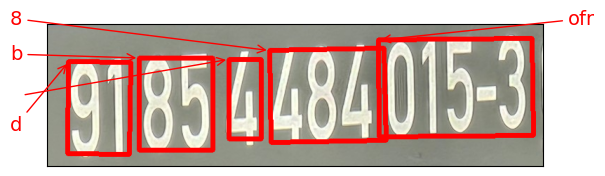

1/1 [==============================] - 2s 2s/step


[('91',
  array([[15., 16.],
         [70., 16.],
         [70., 68.],
         [15., 68.]], dtype=float32)),
 ('85',
  array([[ 86.,  18.],
         [146.,  18.],
         [146.,  69.],
         [ 86.,  69.]], dtype=float32)),
 ('4420',
  array([[158.26938 ,  18.6418  ],
         [276.4691  ,  20.065887],
         [275.83585 ,  72.62453 ],
         [157.63614 ,  71.20044 ]], dtype=float32)),
 ('3003',
  array([[288.77682 ,  19.292812],
         [430.14236 ,  23.256332],
         [428.6141  ,  77.76488 ],
         [287.24857 ,  73.80136 ]], dtype=float32))]

'break'

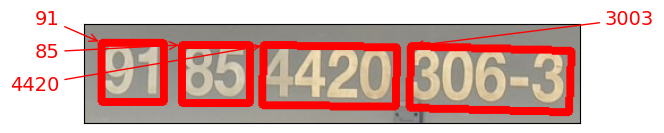

1/1 [==============================] - 1s 946ms/step


[('32',
  array([[ 38.,  39.],
         [138.,  39.],
         [138., 150.],
         [ 38., 150.]], dtype=float32)),
 ('37',
  array([[189.,  54.],
         [274.,  54.],
         [274., 159.],
         [189., 159.]], dtype=float32)),
 ('184',
  array([[327.253  ,  60.42477],
         [501.98346,  80.74226],
         [489.1366 , 191.22517],
         [314.40613, 170.90768]], dtype=float32)),
 ('b2',
  array([[529.5003 ,  90.71255],
         [698.76654, 120.33414],
         [681.03094, 221.68039],
         [511.7647 , 192.0588 ]], dtype=float32))]

'break'

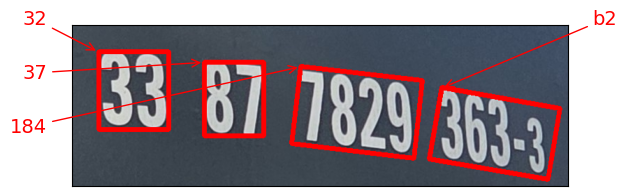

1/1 [==============================] - 1s 1s/step


[('3',
  array([[ 43.,  20.],
         [134.,  20.],
         [134., 123.],
         [ 43., 123.]], dtype=float32)),
 ('ten',
  array([[185.,  19.],
         [347.,  19.],
         [347., 126.],
         [185., 126.]], dtype=float32)),
 ('3',
  array([[ 77., 181.],
         [161., 181.],
         [161., 275.],
         [ 77., 275.]], dtype=float32)),
 ('fmsn',
  array([[224.50656, 184.121  ],
         [513.36926, 181.08032],
         [514.531  , 291.44705],
         [225.66833, 294.48773]], dtype=float32)),
 ('',
  array([[127.24873, 337.51776],
         [368.1624 , 354.7259 ],
         [359.73602, 472.69543],
         [118.82234, 455.4873 ]], dtype=float32)),
 ('ec',
  array([[410.35602, 353.799  ],
         [689.30914, 359.92987],
         [686.63544, 481.5854 ],
         [407.6823 , 475.45453]], dtype=float32))]

'break'

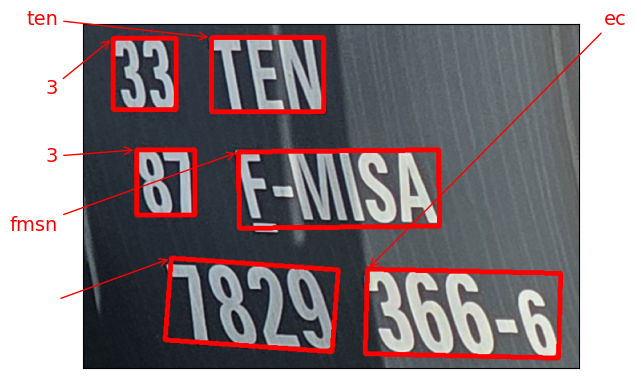

1/1 [==============================] - 2s 2s/step


[('tfn',
  array([[127.0289  ,  20.213596],
         [251.05383 ,  17.260616],
         [253.00342 ,  99.14276 ],
         [128.97849 , 102.09575 ]], dtype=float32)),
 ('3',
  array([[ 24.,  28.],
         [ 95.,  28.],
         [ 95., 106.],
         [ 24., 106.]], dtype=float32)),
 ('fmsan',
  array([[162.81908, 145.31581],
         [375.3664 , 134.45576],
         [379.63116, 217.924  ],
         [167.08386, 228.78404]], dtype=float32)),
 ('3',
  array([[ 57., 149.],
         [121., 149.],
         [121., 221.],
         [ 57., 221.]], dtype=float32)),
 ('r',
  array([[306., 267.],
         [520., 267.],
         [520., 359.],
         [306., 359.]], dtype=float32)),
 ('n',
  array([[ 96.40431, 270.15363],
         [278.26752, 267.9358 ],
         [279.40088, 360.87323],
         [ 97.53769, 363.09106]], dtype=float32))]

'break'

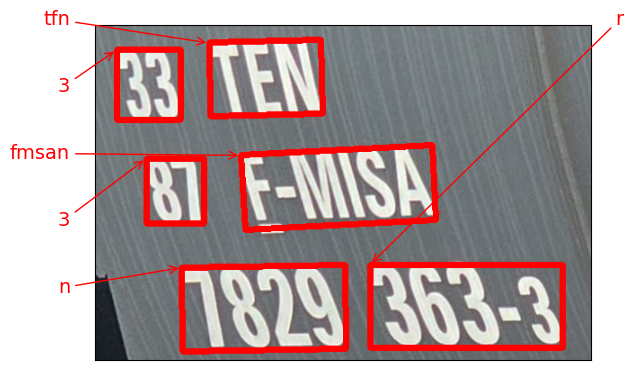

1/1 [==============================] - 1s 911ms/step


[('32',
  array([[ 19.,  29.],
         [ 99.,  29.],
         [ 99., 119.],
         [ 19., 119.]], dtype=float32)),
 ('2',
  array([[135.,  41.],
         [201.,  41.],
         [201., 129.],
         [135., 129.]], dtype=float32)),
 ('1n',
  array([[238.82974 ,  50.777294],
         [373.2402  ,  68.698685],
         [361.25766 , 158.56769 ],
         [226.8472  , 140.6463  ]], dtype=float32)),
 ('wa',
  array([[385.27405,  76.49603],
         [519.05804, 102.94171],
         [502.39648, 187.22955],
         [368.6125 , 160.78387]], dtype=float32))]

'break'

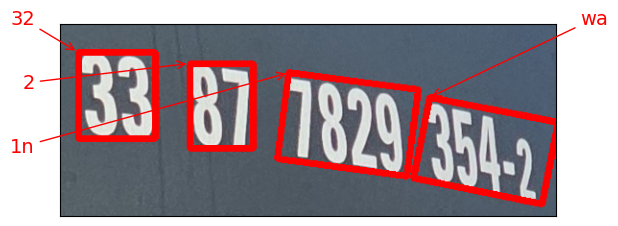

1/1 [==============================] - 1s 1s/step


[('ooob',
  array([[377.99994,   8.     ],
         [544.99994,   8.     ],
         [544.99994,  66.99999],
         [377.99994,  66.99999]], dtype=float32)),
 ('19',
  array([[286.,   9.],
         [361.,   9.],
         [361.,  69.],
         [286.,  69.]], dtype=float32)),
 ('92',
  array([[194.,  11.],
         [270.,  11.],
         [270.,  73.],
         [194.,  73.]], dtype=float32)),
 ('g9',
  array([[13., 13.],
         [88., 13.],
         [88., 72.],
         [13., 72.]], dtype=float32)),
 ('85',
  array([[104.,  13.],
         [179.,  13.],
         [179.,  72.],
         [104.,  72.]], dtype=float32))]

'break'

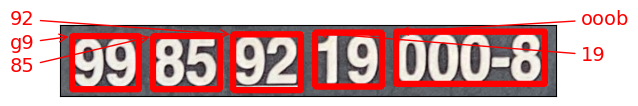

1/1 [==============================] - 1s 917ms/step


[('0010',
  array([[292.60934 ,  10.530659],
         [435.81656 ,   8.694653],
         [436.41293 ,  55.21265 ],
         [293.20572 ,  57.048656]], dtype=float32)),
 ('2043',
  array([[143.71368 ,  12.072058],
         [286.89417 ,  10.827002],
         [287.2779  ,  54.954094],
         [144.09741 ,  56.19915 ]], dtype=float32)),
 ('o',
  array([[ 8.      , 14.      ],
         [68.99999 , 14.      ],
         [68.99999 , 53.999992],
         [ 8.      , 53.999992]], dtype=float32)),
 ('36',
  array([[ 69.,  14.],
         [135.,  14.],
         [135.,  55.],
         [ 69.,  55.]], dtype=float32))]

'break'

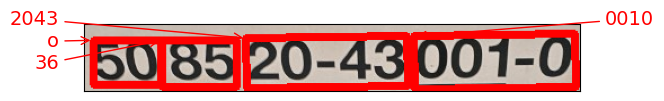

1/1 [==============================] - 2s 2s/step


[('oo2',
  array([[531.6408  ,  26.277054],
         [795.14264 ,  19.85019 ],
         [797.233   , 105.55531 ],
         [533.73114 , 111.98218 ]], dtype=float32)),
 ('937b',
  array([[284.60687 ,  38.880905],
         [511.3753  ,  29.543365],
         [514.85126 , 113.95906 ],
         [288.08282 , 123.2966  ]], dtype=float32)),
 ('3b',
  array([[153.65138 ,  44.111713],
         [264.50052 ,  39.764683],
         [267.76886 , 123.1071  ],
         [156.91971 , 127.45413 ]], dtype=float32)),
 ('99',
  array([[ 23.89324 ,  47.34162 ],
         [132.5338  ,  45.291817],
         [134.14626 , 130.75195 ],
         [ 25.505692, 132.80176 ]], dtype=float32))]

'break'

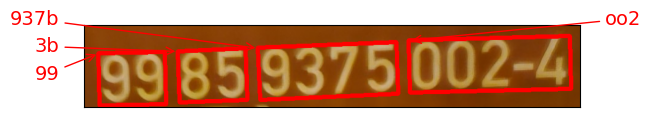

1/1 [==============================] - 1s 935ms/step


[('99',
  array([[ 15.,   6.],
         [103.,   6.],
         [103.,  76.],
         [ 15.,  76.]], dtype=float32)),
 ('8b',
  array([[124.419464,   8.285518],
         [214.99548 ,  10.212669],
         [213.53983 ,  78.62852 ],
         [122.963806,  76.70136 ]], dtype=float32)),
 ('9177',
  array([[233.30382 ,  10.089071],
         [402.4372  ,  12.15168 ],
         [401.59912 ,  80.87316 ],
         [232.46574 ,  78.810555]], dtype=float32)),
 ('002',
  array([[426.56216 ,  12.262772],
         [627.02686 ,  16.818787],
         [625.4492  ,  86.23749 ],
         [424.98453 ,  81.68147 ]], dtype=float32))]

'break'

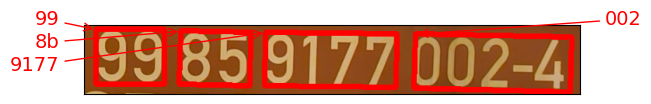

In [54]:
import re
def getKerasOcrEVN(imgObject, print = False):

  ocrResult = pipeline.recognize([imgObject])
  #DEBUG:
  display(ocrResult[0])
  ocrResultText = sortKerasResults(ocrResult[0])

  if print:
    keras_ocr.tools.drawAnnotations(imgObject, ocrResult[0])
    plt.show()


  #DEBUG: print(ocrResultText)
  returnEVN = re.sub('\D','',str(ocrResultText))

  #DEBUG: print(returnEVN)
  return (returnEVN, isEVNValid(returnEVN))

#DEBUG:
#print(getKerasOcrEVN(croppedImages[6], print = True))
for i in range(10,20):
  getKerasOcrEVN(croppedImages[i], print = True)